# K Nearest Neighbours

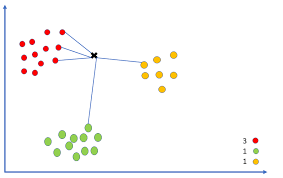

- Supervised Learning Algorithm



- **Classification of a Datapoint** is being performed by a **popularity voting of its K-nearest neighbours**; so the unknown datapoint will receive the class of its nearest neighbours



- calculation of the distances by using the **euclidean distance** between to points; example for the calculation of the euclidean distance between 2 points in a 2D-space:


<div>

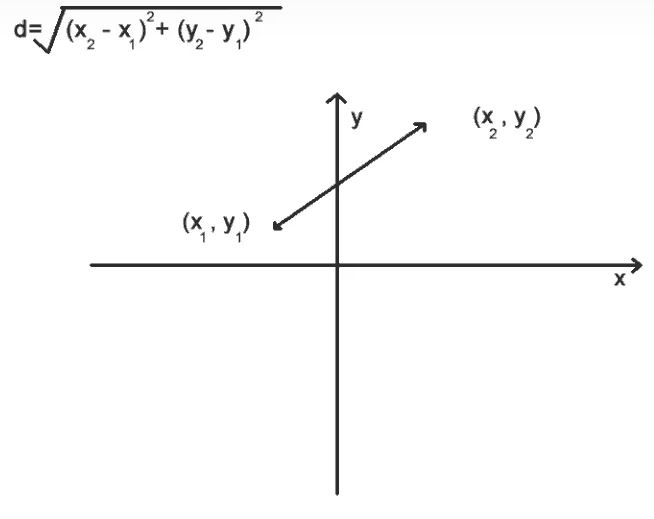
</div>

or as a formula:

**Euclidean Distance:**

$ d(p,q) = \sqrt{\sum_{n=1}^{n} (q_i - p_i)^2} $  

n = n_dimensions


So steps of the implementation are:
1) 

In [22]:
import numpy as np
from collections import Counter

# function to calculate the euclidean distance between 2, (multidimensional) points according to the formula above
def calculate_euclidean_distance(X1, X2):       
    return np.sqrt(np.sum(X2-X1)**2)

# convention: Uppercase written letters symbolize (possibly) multidimensional vectors, lowercase letters 1d-vectors
class KNN:
    # K = amount of neighbors of a datapoint that will perform the popularity voting
    def __init__(self, K = 3):
        self.K = K
    
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # function to apply the model on given in X-data; X can be 2D here aka have more than only 1 row of features
    def predict(self, X):        
        
        # create a list of prediction(s)
        predicted_labels = [self._predict(x) for x in X]
        
        
        return np.array(predicted_labels)
        
        
    # helpermethod to apply the model on one single x-row using the folloing strategy: 
    # 1) calculate euclidean distances between sample and each labeled point
    # 2) get the k nearest samples and their labels
    # 3) do a majority voting and choose most common class label
    def _predict(self, x):
        # 1)
        # calculating distances to all X_train datapoints using the global calculate_euclidean_distance() method
        distances = [calculate_euclidean_distance(x, x_train) for x_train in X_train]
        
        # 2)
        # np.argort() will sort the calculated distances by size; k_indices is an array containing the sorted indices of 
        # the distances from 0 to K 
        k_indices = np.argsort(distances)[: self.K]        
        # get their labels
        k_nearest_labels = [self.y_train[k_index] for k_index in k_indices]
        
        # 3)
        # the Counter() function will return the counts of the labels of the k_nearest_labels as a list of touples
        # in the form (value, count); as we also applied the function most_common(1) we will receive the only the 
        # label with the highest count 
        most_common_label = Counter(k_nearest_labels).most_common(1)
        
        # as most_common_label is a list of one touple in the form (value, count) we return the 0. element of the touple
        # of the 0. element in the list
        return most_common_label[0][0]
    
    
    # function to calculate the model accuracy
    def calculate_accuracy(self, predictions, y_test):
        
        # accuracy is the sum of correct predictions divided by the amount of total predictions
        accuracy = (np.sum(predictions == y_test))/ len(predictions)
        return accuracy
        
        
        
        

## Testing the model

### testing by using the iris dataset

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X, y = iris.data, iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)





# instantiate a KNN classifier-object from class

knn_classifier = KNN(K = 3)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)


accuracy = knn_classifier.calculate_accuracy(predictions, y_test)
print(accuracy)


0.9333333333333333
